## Stellar Classification Dataset

Base de dados pública disponível em: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17s

O objetivo desse projeto é entender melhor a aplicação da técnica de Análise de Componentes Principais.


In [272]:
import pandas as pd
import numpy as np

data_star = pd.read_csv('data/star_classification.csv')
data_star

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [273]:
from sklearn.preprocessing import LabelEncoder

# Predições
y_class = data_star["class"].values

classes = np.unique(y_class)

labelEncoder = LabelEncoder()  # Funcao para gerar IDs para as classes
y = labelEncoder.fit_transform(y_class)

classes_label = np.unique(y, return_counts=True)

classificacoes = {
    'class': classes,
    'label': classes_label[0],
    'quantity': classes_label[1]
}

df = pd.DataFrame(classificacoes)
df.head()

,class,label,quantity
0,GALAXY,0,59445
1,QSO,1,18961
2,STAR,2,21594


In [274]:
from sklearn.preprocessing import StandardScaler

# Features
x = data_star.loc[:, data_star.columns != 'class'].values

media_original = np.mean(x, axis=0)
desvio_original = np.std(x, axis=0)

standardScaler = StandardScaler()  # Objeto para normalizar a escala das features
x = standardScaler.fit_transform(x.astype(float))

media_padronizada = np.mean(x, axis=0)
desvio_padronizado = np.std(x, axis=0)

# Existe uma variação na escala dos dados, exemplo:
# O atributo redshift: 0.634
# Enquanto o alpha: 338.74
# O standardScaler padroniza de forma que os dados tenham média zero
# E desvio padrão 1

features = {
    'media_original': media_original,
    'desvio_original': desvio_original,
    'media_padronizada': media_padronizada,
    'desvio_padronizado': desvio_padronizado
}

df_features = pd.DataFrame(features)
df_features.head()

,media_original,desvio_original,media_padronizada,desvio_padronizado
0,1.237665e+18,8.438518e+12,1.761978e-11,1.0
1,1.776291e+02,9.650176e+01,-3.970513e-16,1.0
2,2.413530e+01,1.964457e+01,1.173817e-16,1.0
3,2.198047e+01,3.176913e+01,2.279066e-17,1.0
4,2.053139e+01,3.175013e+01,2.815526e-17,1.0


In [275]:
print(f'X shape: {x.shape}')
print(f'y shape: {y.shape}')

X shape: (100000, 17)
y shape: (100000,)


In [276]:
# Separando dados

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.15)

print(f'Treino: {len(xTrain)} \nTeste: {len(xTest)}')

Treino: 85000 
Teste: 15000


In [277]:
# Treinamento utilizando apenas LogisticRegression

import time
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=500)

start_time = time.perf_counter()
model.fit(xTrain, yTrain)
end_time = time.perf_counter()

print("Tempo: ", end_time - start_time)
model.score(xTest, yTest)

Tempo:  1.3247354770001039


0.9538

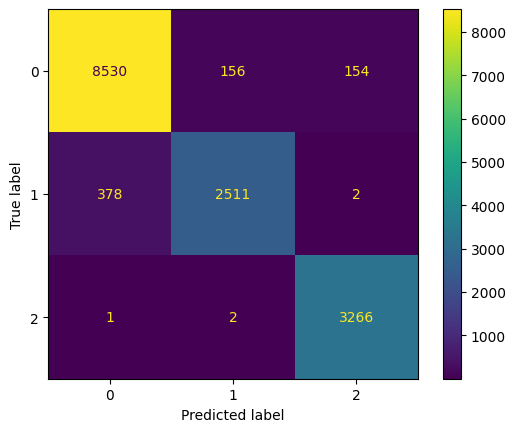

In [278]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, xTest, yTest)

In [279]:
# Para aplicar o PCA o dados tem que estarem normalizados

from sklearn import decomposition

pca = decomposition.PCA(n_components=10)
xTrain = pca.fit_transform(xTrain)
xTest = pca.transform(xTest)

pc_array = pca.explained_variance_ratio_
print(f'Soma das componentes principais: {
      np.sum(pca.explained_variance_ratio_).round(3)}')

# Com 10 componentes, temos uma representação de 0.997% dos dados originais, ou seja,
# Descartamos toda redundância sem perder informação importante.

Soma das componentes principais: 0.995


In [280]:
print(f'Shape após o PCA')
print(f'x_train shape: {xTrain.shape}')
print(f'y_train shape: {yTrain.shape}')

Shape após o PCA
x_train shape: (85000, 10)
y_train shape: (85000,)


In [281]:
# Treinamento com após o PCA

model = LogisticRegression(solver='lbfgs', max_iter=500)

start_time = time.perf_counter()
model.fit(xTrain, yTrain)
end_time = time.perf_counter()

print("Tempo: ", end_time - start_time)
model.score(xTest, yTest)

Tempo:  0.6740567909992023


0.949

In [282]:
# Teste para visualização do PCA
pca_viewer = decomposition.PCA(n_components=2)
principal_components = pca_viewer.fit_transform(xTrain)


# Explained_Variance_Ratio representa o quando as componentes representa os dados originais
# [0.28, 0.21] ou seja, o pca explica 49% dos dados originais representando uma perca de 51% de informação
print(pca_viewer.explained_variance_ratio_)

[0.28568018 0.21263563]


In [283]:
pc_df = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])
pc_df.head()

,pc1,pc2
0,2.317946,-0.281873
1,3.449708,-0.441740
2,3.463598,-0.438252
3,-0.142938,0.005880
4,-0.145088,0.058683


In [284]:
yTrain.astype(int)
# Troca o label pela classe
yTrain = labelEncoder.inverse_transform(yTrain)

yTrain

array(['GALAXY', 'QSO', 'GALAXY', ..., 'QSO', 'GALAXY', 'GALAXY'],
      dtype=object)

<Figure size 640x480 with 0 Axes>

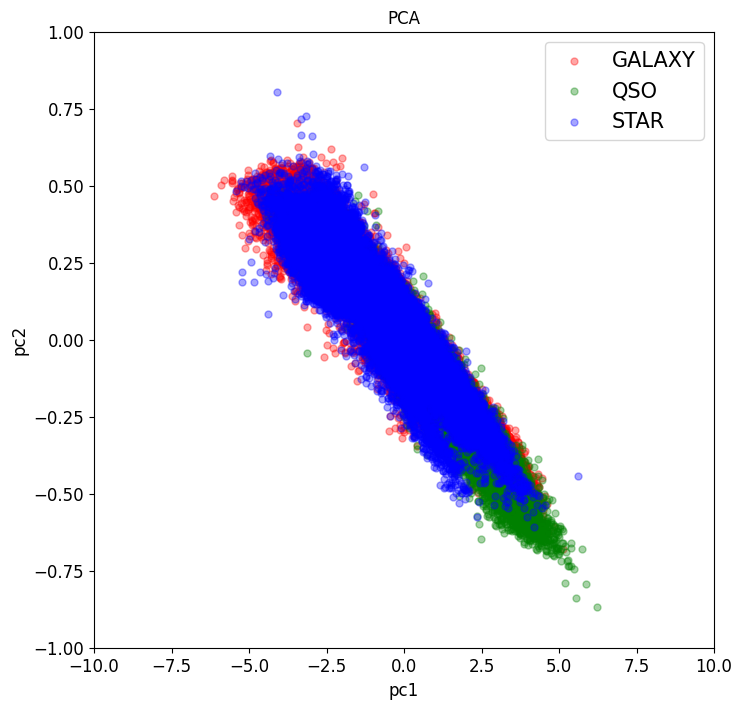

In [285]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(8, 8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('pc1', fontsize=12)
plt.ylabel('pc2', fontsize=12)
plt.xlim(-10, 10)
plt.ylim(-1, 1)
plt.title("PCA", fontsize=12)
colors = ['r', 'g', 'b']

for classe, color in zip(classes, colors):
    indexKeep = yTrain == classe
    plt.scatter(pc_df.loc[indexKeep, 'pc1'],
                pc_df.loc[indexKeep, 'pc2'],
                c = color, s = 25, alpha = 0.35)
plt.legend(classes, prop={'size': 15})
plt.show()
